### The Knapsack Problem

Suppose that we are given a *knapsack* and we want to pack it until it fully with items. There may be many different items of different shapes and sizes, and our goal is to pack the knapsack as full as possible.

**Problem**: Give an integer $K$ and $n$ items of different sizes such that the $i$th item has an integer size $k_i$, find a subset of the items whose sizes sum to exactly $K$, or determine that no such subset exists.

We denote the problem by $P(n, K)$, such that $n$ denotes the number of items and $K$ denotes the size of the knapsack.

Note that we do not include the sizes in the notation of the problem.

**Induction hypothesis (first attempt)**: We know how to solve $P(n-1, K)$.

* The base case is easy; there is a solution only if the single element is of size $K$.

* 1) If there is a solution to $P(n-1, K)$, that is a way to pack some of the $n-1$ items into the knapsack --- then we are done; we simply not use the $n$th item.

* 2) If there is no solution for $P(n-1, K)$, then we include the $n$th item and check $P(n-1, K-k_n)$.

In this case, we reduce the problem to two smaller subproblems: $P(n-1, K)$ and $P(n-1, K-k_n)$.

**Induction hypothesis (second attempt)**: We know how to solve $P(n-1, k)$ for all $0 \le k \le K$.

* The base case $P(1, k)$ for all $0 \le k \le K$ can be easily solved: If $K=0$, then there is always a trivial solution. Otherwise, there is a solution only if the first item is of size $k$.

* We now redce $P(n, k)$ to two problems $P(n-1, k)$ and $P(n-1, k-k_n)$.

 * If $k-k_n \lt 0$, we ignore the second problem.
 * Now we reduced a problem od size $n$ to two problems of size $n-1$. (We also reduce the value of $k$ in one subproblem).
 * However, the algorithm may be inefficient. (an exponential algorithm)
 
* $P(i, k)$ denotes the problem with the first $i$ items and and a knapsack of size $k$.
 * There are $n$ possibilities for the first parameters and $K$ possibilities for the second one.
 * Overall, there are $nK$ different possible problems.
 * But the running time of the algorithm resulted from doubling the number of problems after every reduction.
 * In this case, some problems have been solved many times.
 * So we can store all the known results in an $n \times K$ matrix.

|      | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
|------|---|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|
| k0   | O | - | - | - | - | - | - | - | - | - | -  | -  | -  | -  | -  | -  | -  |
| k1=2 | O | - | I | - | - | - | - | - | - | - | -  | -  | -  | -  | -  | -  | -  |
| k2=3 | O | - | O | I | - | I | - | - | - | - | -  | -  | -  | -  | -  | -  | -  |
| k3=5 | O | - | O | O | - | O |   | I | I | - | I  | -  | -  | -  | -  | -  | -  |
| k4=6 | O | - | O | O | - | O | I | O | O | - | O  | I  | -  | I  | I  | -  | I  |

I: a solution containing this item

O: a solution without this item

-: no solution

In [1]:
def knapsack_dp(items, K):
    
    # [exist, belong]
    table = [[[None, None] for k in range(K+1)] for i in range(len(items)+1)]
    
    # base case: first cell
    table[0][0] = [True, False]
    
    # base case: first row
    for k in range(1, K+1):
        table[0][k] = [False, False]
        
    # for each row in the table
    for i in range(1, len(items)+1):
        item_name, size = items[i-1]
        for k in range(K+1):
            table[i][k] = [False, False] # init default value
            
            # subproblem 1
            if table[i-1][k][0] == True:
                table[i][k] = [True, False]
            
            elif k >= size: # do not ignore subproblem 2
                if table[i-1][k-size][0] == True:
                    table[i][k] = [True, True]
    return table

In [2]:
def print_table(table):
    n = len(table)
    k = len(table[0])
    
    for i in range(n):
        for j in range(k):
            if table[i][j][0] and table[i][j][1]:
                print("I ", end='')
            elif table[i][j][0] and not table[i][j][1]:
                print("O ", end='')
            else:
                print('- ', end='')
        print()

In [3]:
items = [('k1', 2), ('k2', 3), ('k3', 5), ('k4', 6)]
t = knapsack_dp(items, 16)
print_table(t)

O - - - - - - - - - - - - - - - - 
O - I - - - - - - - - - - - - - - 
O - O I - I - - - - - - - - - - - 
O - O O - O - I I - I - - - - - - 
O - O O - O I O O I O I - I I - I 


In [4]:
# Q: Big O?

In [5]:
def knapsack_re(items, k):
    
    # base case: first cell
    if len(items) == 0 and k == 0:
        return True
    
    # base case: first row
    if len(items) == 0 and k > 0:
        return False
    
    # divide
    for item in items:
        size = item
        
        # sub 1
        cur_items = items.copy()
        cur_items.remove(item)
        
        sub1 = knapsack_re(cur_items, k) # conquer
        if sub1:
            return True # merge
        
        # sub 2
        if k >= size:
            cur_items = items.copy()
            cur_items.remove(item)
            sub2 = knapsack_re(cur_items, k-size) # conquer
            if sub2:
                return True # merge
    
    return False # merge

In [6]:
items = [2, 3, 5, 6]

for k in range(17):
    print(k, knapsack_re(items, k))

0 True
1 False
2 True
3 True
4 False
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 False
13 True
14 True
15 False
16 True


### Global/Local Sequence Alignment

Local alognment: **Smith–Waterman** algorithm https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm

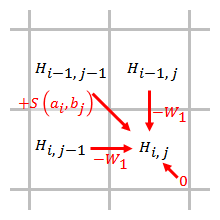

In [7]:
from IPython.display import Image
Image(filename='Smith-Waterman.png', width=300)

Smith–Waterman Scoring Matrix
https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm

step 1: the score in the first column cells and the first row cells is zero. 

For each cell, compute the max of the following values
* ==: +S(ai, bj) where ai==bj, e.g., +3
* !=: +S(ai, bj) where ai!=bj, e.g., -3
* gap penalty: -W1, e.g., -2
* 0

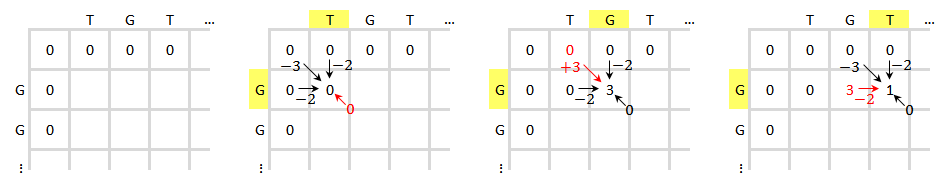

In [8]:
Image(filename='Smith-Waterman-Example.png', width=800)

In [9]:
# Q: Big O?
# Q: How to improve such dynamic programming problem?

# Note: there are many variants of Smith-Waterman
# for example, gap penalty is not linear, reward is related to i and j, and etc.

In [10]:
x = "0TGTTACGG"
y = "0GGTTGACTA"

S = 3
G = 2

In [11]:
import pprint

scoringMatrix = [[0 for _ in range(len(x))] for _ in range(len(y))]
walkMatrix = [[0 for _ in range(len(x))] for _ in range(len(y))]

pprint.pprint(scoringMatrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [12]:
# dynamic programming for local alignment

def localAlign(x, y, S, G, scoringMatrix, walkMatrix):
    
    m = len(x)
    n = len(y)
    
    highest_score = 0
    highest_xy = (0, 0)
    
    for i in range(1, n): # first col/row are all zeros, no need to process
        for j in range(1, m):

            # case 1: matched or mismatched
            if x[j] == y[i]:
                top_left = scoringMatrix[i-1][j-1] + S
                label = 'o'
            else:
                top_left = scoringMatrix[i-1][j-1] - S
                label = 'x'

            # case 2: gap top (linear penalty)
            top = scoringMatrix[i-1][j] - G

            # case 3: gap left (linear penalty)
            left = scoringMatrix[i][j-1] - G


            # record scoringMatrix and walkMatrix
            scoringMatrix[i][j] = max(top_left, top, left, 0)

            if scoringMatrix[i][j] == top_left:
                walkMatrix[i][j] = label
            elif scoringMatrix[i][j] == top:
                walkMatrix[i][j] = 't'
            elif scoringMatrix[i][j] == left:
                walkMatrix[i][j] = 'l'
            else:
                walkMatrix[i][j] = 0

            # record highest_score and highest_xy
            if scoringMatrix[i][j] > highest_score:
                highest_score = scoringMatrix[i][j]
                highest_xy = (i, j)
                
    return highest_score, highest_xy

In [13]:
highest_score, highest_xy = localAlign(x, y, S, G, scoringMatrix, walkMatrix)

print(highest_score)
print(highest_xy)

for row in scoringMatrix:
    for cell in row:
        print(cell, "", end="")
    print()

print()

for row in walkMatrix:
    for cell in row:
        print(cell, "", end="")
    print()

13
(7, 6)
0 0 0 0 0 0 0 0 0 
0 0 3 1 0 0 0 3 3 
0 0 3 1 0 0 0 3 6 
0 3 1 6 4 2 0 1 4 
0 3 1 4 9 7 5 3 2 
0 1 6 4 7 6 4 8 6 
0 0 4 3 5 10 8 6 5 
0 0 2 1 3 8 13 11 9 
0 3 1 5 4 6 11 10 8 
0 1 0 3 2 7 9 8 7 

0 0 0 0 0 0 0 0 0 
0 0 o l 0 0 0 o o 
0 0 o l 0 0 0 o o 
0 o t o o l l t t 
0 o l o o l l l t 
0 t o l t x x o o 
0 0 t x t o l t x 
0 0 t x t t o l l 
0 o l o o t t x x 
0 t x t x o t x x 


In [14]:
i, j = highest_xy

while i != 0 and j != 0:
    if walkMatrix[i][j] == 'o':
        print(x[j], y[i], walkMatrix[i][j], scoringMatrix[i][j])
        i -= 1
        j -= 1
    elif walkMatrix[i][j] == 't':
        print('-', y[i], walkMatrix[i][j], scoringMatrix[i][j])
        i -= 1
    elif walkMatrix[i][j] == 'l':
        print(x[j], '-', walkMatrix[i][j], scoringMatrix[i][j])
        j -= 1
    else: # 0
        break

C C o 13
A A o 10
- G t 7
T T o 9
T T o 6
G G o 3


Global alignment: **Needleman–Wunsch** algorithm https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm

In [15]:
x_g = "0GCATGCU"
y_g = "0GATTACA"

m_g = len(x_g)
n_g = len(y_g)

S_g = 1
G_g = 1

In [16]:
scoringMatrix_g = [[0 if j != 0 else -i for j in range(m_g)] if i != 0 else [-j for j in range(m_g)] for i in range(n_g)]
walkMatrix_g = [[0 for _ in range(m_g)] for _ in range(n_g)]

In [17]:
scoringMatrix_g

[[0, -1, -2, -3, -4, -5, -6, -7],
 [-1, 0, 0, 0, 0, 0, 0, 0],
 [-2, 0, 0, 0, 0, 0, 0, 0],
 [-3, 0, 0, 0, 0, 0, 0, 0],
 [-4, 0, 0, 0, 0, 0, 0, 0],
 [-5, 0, 0, 0, 0, 0, 0, 0],
 [-6, 0, 0, 0, 0, 0, 0, 0],
 [-7, 0, 0, 0, 0, 0, 0, 0]]

In [18]:
# the rest of the codes are 'almost' the same as Smith-Waterman
# scoringMatrix_g is different.

In [19]:
# dynamic programming for global alignment

def globalAlign(x, y, S, G, scoringMatrix, walkMatrix):
    
    m = len(x)
    n = len(y)
    
    for i in range(1, n):
        for j in range(1, m):

            # case 1: matched or mismatched
            if x[j] == y[i]:
                top_left = scoringMatrix[i-1][j-1] + S
                label = 'o'
            else:
                top_left = scoringMatrix[i-1][j-1] - S
                label = 'x'

            # case 2: gap top (linear penalty)
            top = scoringMatrix[i-1][j] - G

            # case 3: gap left (linear penalty)
            left = scoringMatrix[i][j-1] - G


            # record scoringMatrix and walkMatrix
            scoringMatrix[i][j] = max(top_left, top, left) # <---- different here

            if scoringMatrix[i][j] == top_left:
                walkMatrix[i][j] = label
            elif scoringMatrix[i][j] == top:
                walkMatrix[i][j] = 't'
            elif scoringMatrix[i][j] == left:
                walkMatrix[i][j] = 'l'

In [20]:
globalAlign(x_g, y_g, S_g, G_g, scoringMatrix_g, walkMatrix_g)

for row in scoringMatrix_g:
    for cell in row:
        print(cell, "", end="")
    print()

print()

for row in walkMatrix_g:
    for cell in row:
        print(cell, "", end="")
    print()

0 -1 -2 -3 -4 -5 -6 -7 
-1 1 0 -1 -2 -3 -4 -5 
-2 0 0 1 0 -1 -2 -3 
-3 -1 -1 0 2 1 0 -1 
-4 -2 -2 -1 1 1 0 -1 
-5 -3 -3 -1 0 0 0 -1 
-6 -4 -2 -2 -1 -1 1 0 
-7 -5 -3 -1 -2 -2 0 0 

0 0 0 0 0 0 0 0 
0 o l l l o l l 
0 t x o l l l l 
0 t x t o l l l 
0 t x t o x x x 
0 t x o t x x x 
0 t o t t x o l 
0 t t o t x t x 


In [21]:
i, j = len(x_g)-1, len(y_g)-1 # <---- different here

while not (i == 0 or j == 0):
    if walkMatrix_g[i][j] == 'o' or walkMatrix_g[i][j] == 'x': # <---- different here
        print(x_g[j], y_g[i], walkMatrix_g[i][j], scoringMatrix_g[i][j])
        i -= 1
        j -= 1
    elif walkMatrix_g[i][j] == 't':
        print('-', y_g[i], walkMatrix_g[i][j], scoringMatrix_g[i][j])
        i -= 1
    elif walkMatrix_g[i][j] == 'l':
        print(x_g[j], '-', walkMatrix_g[i][j], scoringMatrix_g[i][j])
        j -= 1

U A x 0
C C o 1
G A x 0
T T o 1
- T t 0
A A o 1
C - l 0
G G o 1
